<a href="https://colab.research.google.com/github/Gabriel-Paes/ml-regression/blob/main/regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carregando o conjunto de dados California Housing
california = fetch_california_housing()
X = california.data
y = california.target

In [ ]:
# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_test.shape

(6192, 8)

In [ ]:
# Pré-processamento: Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Inicializando o regressor de Árvore de Decisão com parâmetros específicos
dt_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_leaf=5, random_state=42)

# Treinando o modelo
dt_regressor.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_dt = dt_regressor.predict(X_test_scaled)

In [ ]:
# Avaliando o modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error:", mse_dt)
print("R^2 Score:", r2_dt)

Mean Squared Error: 0.5211334618725708
R^2 Score: 0.6029580667515306


In [ ]:
# Inicializando o regressor de Floresta Aleatória com parâmetros específicos
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)

# Treinando o modelo
rf_regressor.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_regressor.predict(X_test_scaled)

In [ ]:
# Avaliando o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)

Mean Squared Error: 0.4547582497781757
R^2 Score: 0.6535281115823496


In [ ]:
# Função para plotar os resultados
def plot_results_scatter(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 5))

    # Gráfico de valores reais vs. previstos
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.title(f'Valores Reais vs. Previstos ({model_name})')

    # Gráfico de erros
    errors = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.hist(errors, bins=25, edgecolor='k', alpha=0.7)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição dos Erros ({model_name})')

    plt.tight_layout()
    plt.show()

In [ ]:
# Selecionando um subconjunto aleatório de 1000 amostras de teste
indices = np.random.choice(len(y_test), size=1000, replace=False)
y_test_subset = y_test[indices]
y_pred_dt_subset = y_pred_dt[indices]
y_pred_rf_subset = y_pred_rf[indices]

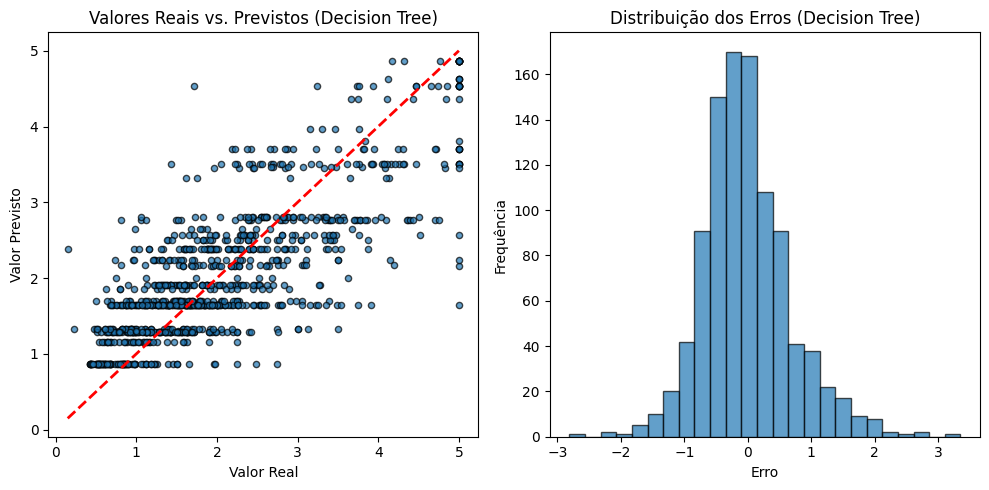

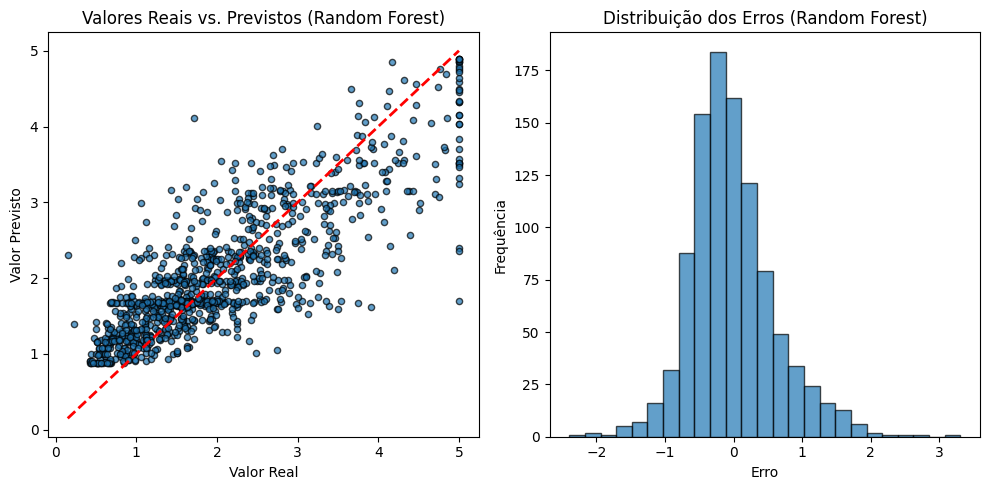

In [ ]:
# Plotando os resultados
plot_results_scatter(y_test_subset, y_pred_dt_subset, 'Decision Tree')
plot_results_scatter(y_test_subset, y_pred_rf_subset, 'Random Forest')

In [ ]:
def plot_results_comparison(y_test, y_pred, model_name):
    plt.figure(figsize=(14, 6))

    # Gráfico de valores reais vs. previstos (Gráfico de Linhas)
    plt.subplot(1, 2, 1)
    plt.plot(y_test, label='Valores Reais', linestyle='--')
    plt.plot(y_pred, label='Valores Previstos', linestyle='-')
    plt.xlabel('Amostras')
    plt.ylabel('Valor')
    plt.title(f'Valores Reais vs. Valores Previstos ({model_name})')
    plt.legend()

    # Gráfico de erros
    errors = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.hist(errors, bins=25, edgecolor='k', alpha=0.7)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição dos Erros ({model_name})')

    plt.tight_layout()
    plt.show()

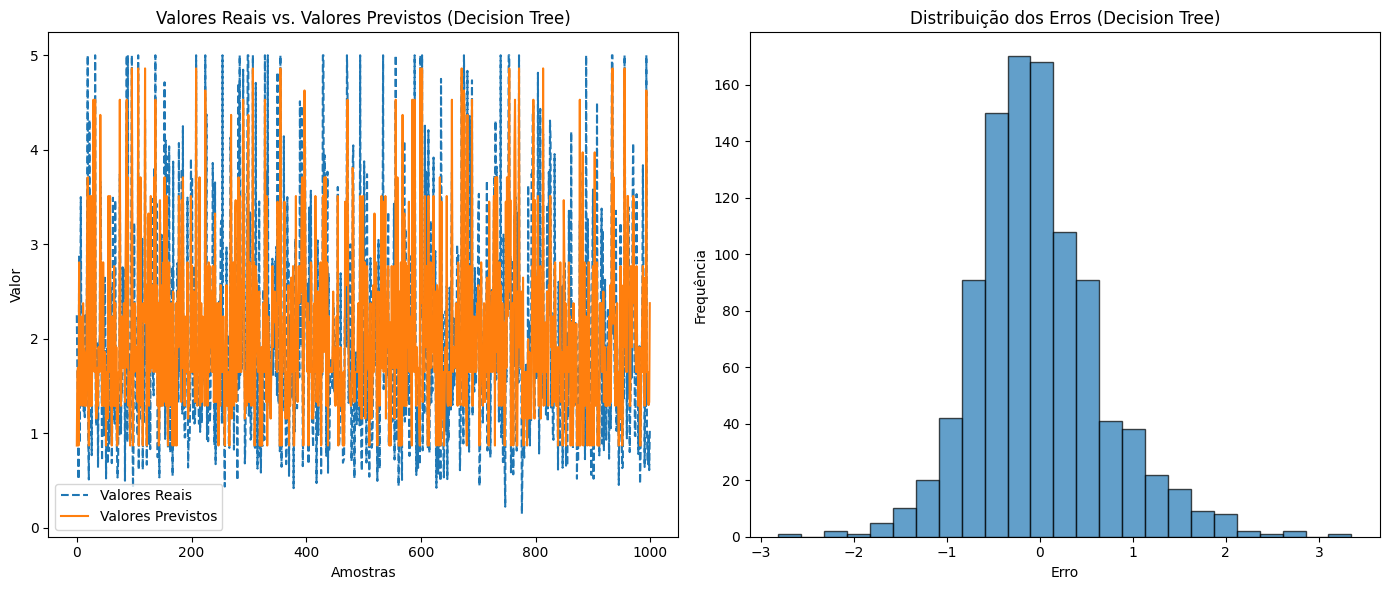

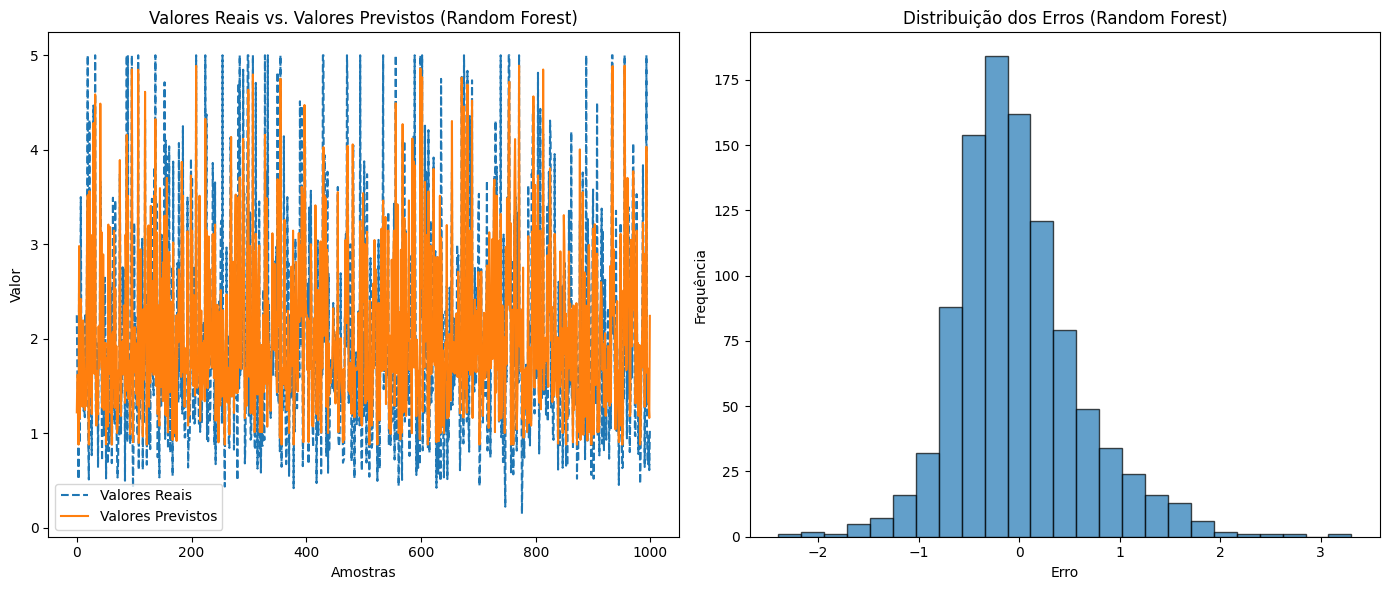

In [ ]:
# Plotando os resultados
plot_results_comparison(y_test_subset, y_pred_dt_subset, 'Decision Tree')
plot_results_comparison(y_test_subset, y_pred_rf_subset, 'Random Forest')

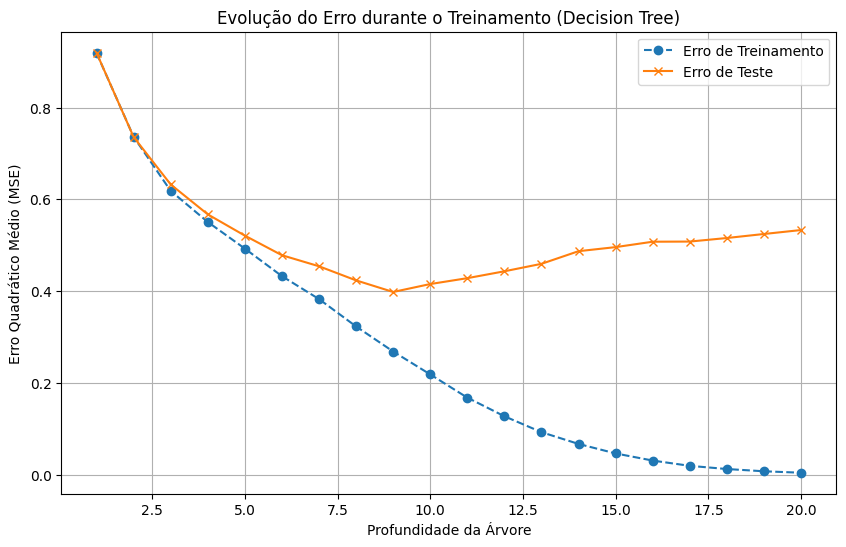

In [ ]:
# Evolução do erro durante o treinamento
depths = range(1, 21)
train_errors = []
test_errors = []

for depth in depths:
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_regressor.fit(X_train_scaled, y_train)
    y_train_pred_dt = dt_regressor.predict(X_train_scaled)
    y_test_pred_dt = dt_regressor.predict(X_test_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_pred_dt))
    test_errors.append(mean_squared_error(y_test, y_test_pred_dt))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Erro de Treinamento', linestyle='--', marker='o')
plt.plot(depths, test_errors, label='Erro de Teste', linestyle='-', marker='x')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Evolução do Erro durante o Treinamento (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

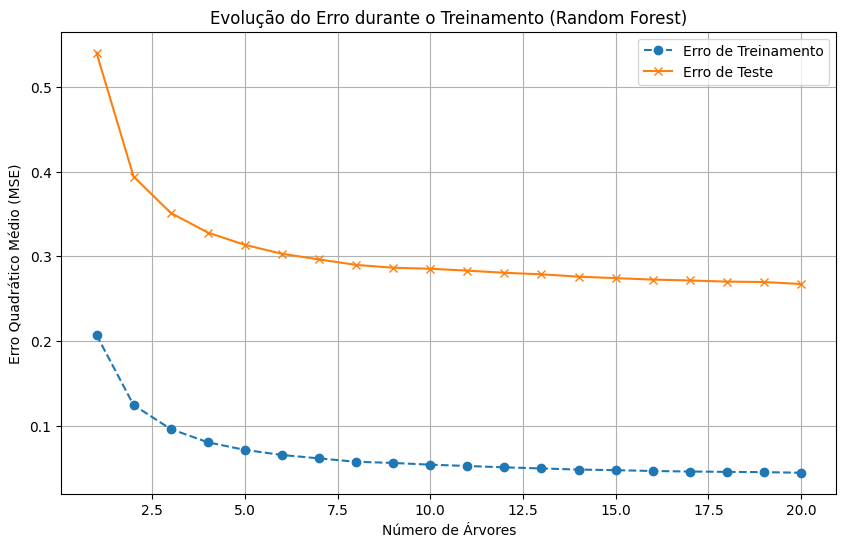

In [ ]:
# Evolução do erro durante o treinamento para Random Forest
estimators = range(1, 21)
train_errors_rf = []
test_errors_rf = []

for n in estimators:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_regressor.fit(X_train_scaled, y_train)
    y_train_pred_rf = rf_regressor.predict(X_train_scaled)
    y_test_pred_rf = rf_regressor.predict(X_test_scaled)
    train_errors_rf.append(mean_squared_error(y_train, y_train_pred_rf))
    test_errors_rf.append(mean_squared_error(y_test, y_test_pred_rf))

plt.figure(figsize=(10, 6))
plt.plot(estimators, train_errors_rf, label='Erro de Treinamento', linestyle='--', marker='o')
plt.plot(estimators, test_errors_rf, label='Erro de Teste', linestyle='-', marker='x')
plt.xlabel('Número de Árvores')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Evolução do Erro durante o Treinamento (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Análise dos Resultados Gerados:")
print("Decision Tree - MSE:", mse_dt, "R^2:", r2_dt)
print("Random Forest - MSE:", mse_rf, "R^2:", r2_rf)

print("\nComparação com os Resultados Random Forest vs. Decision Tree:")
print("MSE Diferença:", mse_rf - mse_dt)
print("R^2 Diferença:", r2_rf - r2_dt)

Análise dos Resultados Gerados:
Decision Tree - MSE: 0.5211334618725708 R^2: 0.6029580667515306
Random Forest - MSE: 0.4547582497781757 R^2: 0.6535281115823496

Comparação com os Resultados Random Forest vs. Decision Tree:
MSE Diferença: -0.06637521209439512
R^2 Diferença: 0.05057004483081895


# Explicação das Diferenças e Prováveis Motivos:

## MSE:

* O MSE do Random Forest é menor do que o do Decision Tree, o que indica que o Random Forest está produzindo previsões com menos erro em média.

* O Random Forest tende a reduzir o erro em comparação com um único Decision Tree devido à sua capacidade de reduzir o overfitting e capturar melhor a relação entre os recursos e a variável de destino.

## R²:

* O R² do Random Forest é maior do que o do Decision Tree, indicando que o Random Forest explica uma maior proporção da variabilidade total nos dados em comparação com o Decision Tree.

* Isso sugere que o Random Forest está melhor ajustado aos dados e é capaz de fazer previsões mais precisas do que um único Decision Tree.

## Prováveis Motivos no Comportamento dos Algoritmos:

* **Capacidade de Generalização**: O Random Forest geralmente tem uma melhor capacidade de generalização em comparação com um único Decision Tree devido à sua natureza de ensemble, que combina múltiplas árvores de decisão treinadas em diferentes subconjuntos de dados.

* **Redução de Overfitting**: O Random Forest reduz o overfitting ao combinar as previsões de várias árvores de decisão, o que ajuda a capturar padrões mais robustos nos dados.

* **Diversidade de Árvores**: Cada árvore de decisão no Random Forest é treinada em um subconjunto aleatório dos dados e com um subconjunto aleatório de recursos, o que resulta em modelos mais diversificados e menos propensos a superajustar aos dados de treinamento.

* **Agregação de Previsões**: Ao agregar as previsões de várias árvores de decisão, o Random Forest é capaz de produzir previsões mais estáveis e geralmente mais precisas do que um único Decision Tree.

In [ ]:
# Teste 1: Random Forest com mais árvores
rf_regressor_more_trees = RandomForestRegressor(n_estimators=150, max_depth=7, min_samples_leaf=7, random_state=42)
rf_regressor_more_trees.fit(X_train_scaled, y_train)
y_pred_rf_more_trees = rf_regressor_more_trees.predict(X_test_scaled)
mse_rf_more_trees = mean_squared_error(y_test, y_pred_rf_more_trees)
r2_rf_more_trees = r2_score(y_test, y_pred_rf_more_trees)

In [ ]:
print("Teste 1 - Random Forest com mais árvores:")
print("   - MSE:", mse_rf_more_trees)
print("   - R^2:", r2_rf_more_trees)

Teste 1 - Random Forest com mais árvores:
   - MSE: 0.36617784544941173
   - R^2: 0.7210158811380559


In [ ]:
# Teste 2: Random Forest com mais árvores ainda
rf_regressor_many_more_trees = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=10,  random_state=42)
rf_regressor_many_more_trees.fit(X_train_scaled, y_train)
y_pred_rf_many_more_trees = rf_regressor_many_more_trees.predict(X_test_scaled)
mse_rf_many_more_trees = mean_squared_error(y_test, y_pred_rf_many_more_trees)
r2_rf_many_more_trees = r2_score(y_test, y_pred_rf_many_more_trees)

In [ ]:
print("Teste 2 - Random Forest com mais árvores ainda:")
print("   - MSE:", mse_rf_many_more_trees)
print("   - R^2:", r2_rf_many_more_trees)

Teste 2 - Random Forest com mais árvores ainda:
   - MSE: 0.29443170243336436
   - R^2: 0.7756779387688479


In [141]:
print("Comparação com os Resultados do Teste 1 vs. Teste 2:")
print("MSE Diferença:", mse_rf_more_trees - mse_rf_many_more_trees)
print("R^2 Diferença:", r2_rf_more_trees - r2_rf_many_more_trees)

Comparação com os Resultados do Teste 1 vs. Teste 2:
MSE Diferença: 0.07174614301604737
R^2 Diferença: -0.054662057630792016


In [135]:
y_pred_rf_more_trees_subset = y_pred_rf_more_trees[indices]
y_pred_rf_many_more_trees_subset = y_pred_rf_many_more_trees[indices]

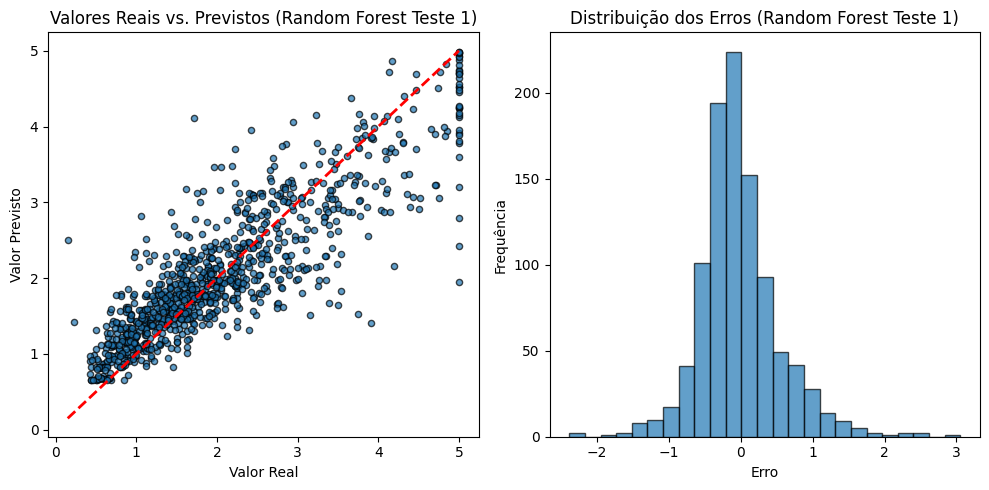

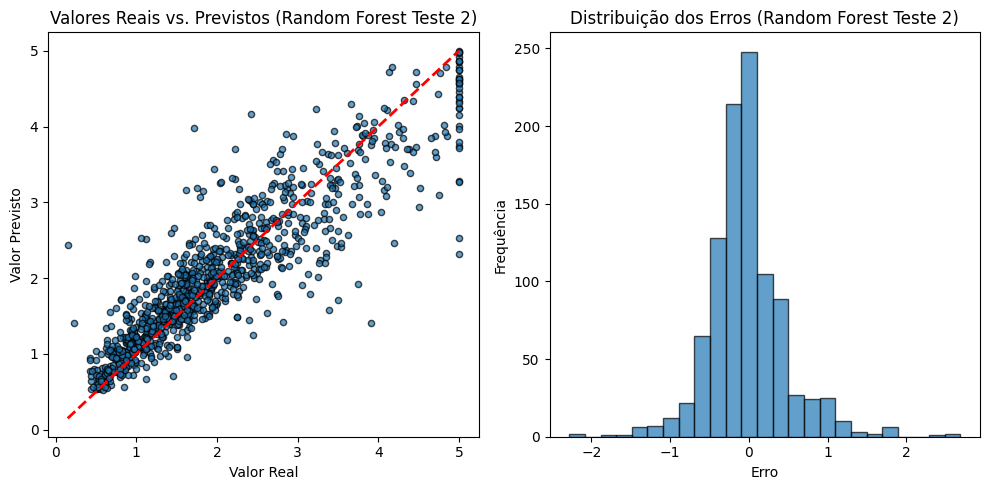

In [136]:
plot_results_scatter(y_test_subset, y_pred_rf_more_trees_subset, 'Random Forest Teste 1')
plot_results_scatter(y_test_subset, y_pred_rf_many_more_trees_subset, 'Random Forest Teste 2')

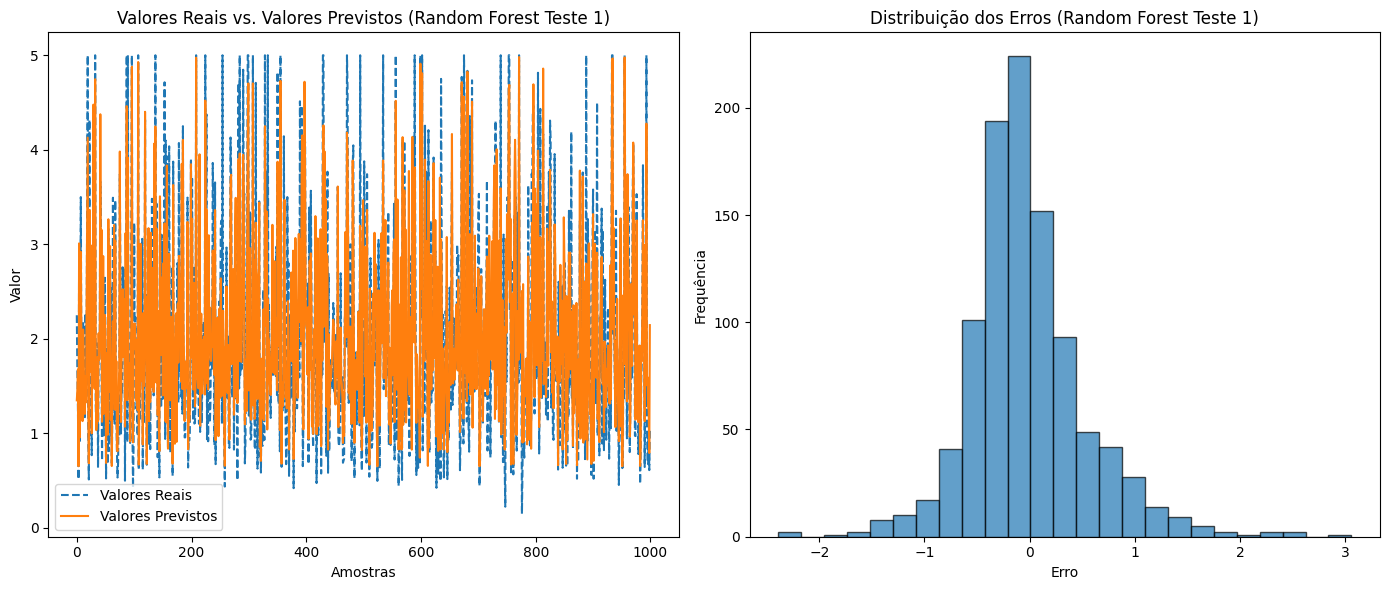

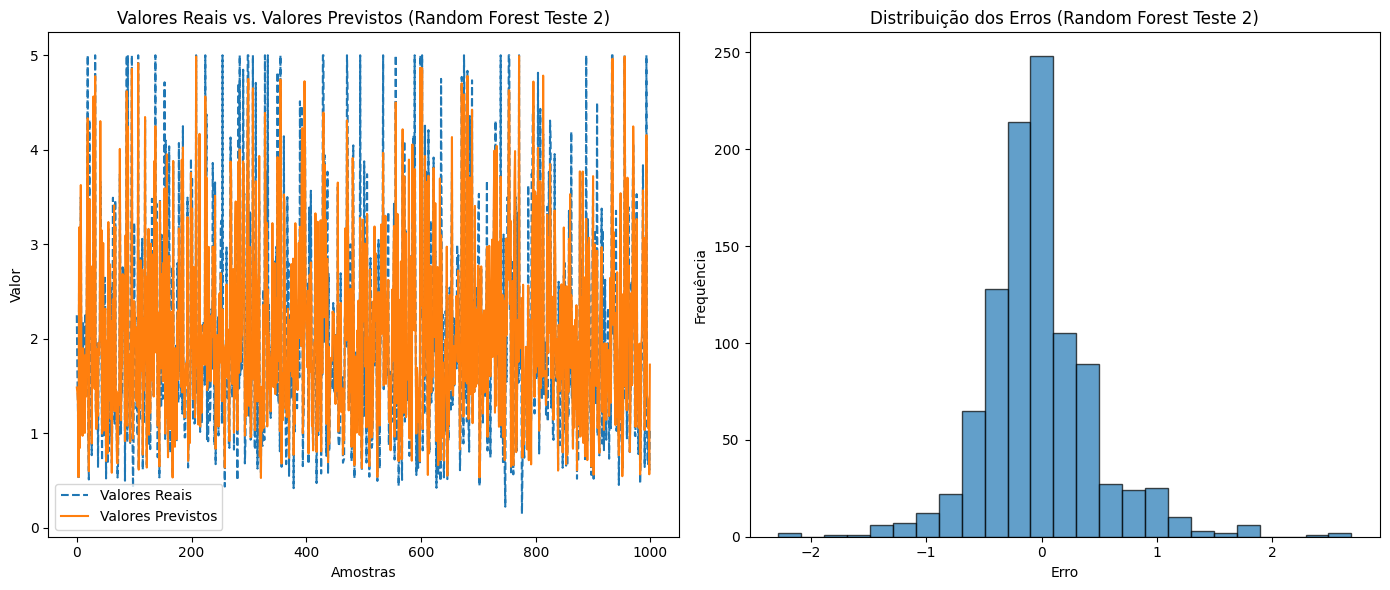

In [137]:
plot_results_comparison(y_test_subset, y_pred_rf_more_trees_subset, 'Random Forest Teste 1')
plot_results_comparison(y_test_subset, y_pred_rf_many_more_trees_subset, 'Random Forest Teste 2')